# APPLE Stock Prediction Using Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.graph_objs as go
from plotly.offline import plot

#for offline plotting
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [2]:
apple = pd.read_csv('apple.csv')
apple.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1
1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1
2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1
3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1
4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1


In [3]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1258 non-null   object 
 1   date         1258 non-null   object 
 2   close        1258 non-null   float64
 3   high         1258 non-null   float64
 4   low          1258 non-null   float64
 5   open         1258 non-null   float64
 6   volume       1258 non-null   int64  
 7   adjClose     1258 non-null   float64
 8   adjHigh      1258 non-null   float64
 9   adjLow       1258 non-null   float64
 10  adjOpen      1258 non-null   float64
 11  adjVolume    1258 non-null   int64  
 12  divCash      1258 non-null   float64
 13  splitFactor  1258 non-null   int64  
dtypes: float64(9), int64(3), object(2)
memory usage: 137.7+ KB


In [4]:
apple['date'] = pd.to_datetime(apple['date'])

In [5]:
print(f'Dataframe contains stock prices between {apple.date.min()} {apple.date.max()}') 
print(f'Total days = {(apple.date.max()  - apple.date.min()).days} days')

Dataframe contains stock prices between 2015-05-27 00:00:00+00:00 2020-05-22 00:00:00+00:00
Total days = 1822 days


In [6]:
apple.describe()

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.0
mean,167.723998,169.230475,166.039780,167.548266,3.500397e+07,162.666715,164.131054,161.028013,162.493082,3.500397e+07,0.010477,1.0
std,56.850796,57.500128,56.006773,56.612707,1.729100e+07,58.733820,59.402842,57.869246,58.494560,1.729100e+07,0.083366,0.0
min,90.340000,91.670000,89.470000,90.000000,1.136204e+07,84.954351,86.205062,84.136216,84.634620,1.136204e+07,0.000000,1.0
25%,116.327500,117.405000,115.602500,116.482500,2.359205e+07,109.484490,110.393556,107.962457,109.135002,2.359205e+07,0.000000,1.0
50%,160.485000,162.080000,158.974250,160.345000,3.064771e+07,154.710645,156.091874,153.054341,154.410017,3.064771e+07,0.000000,1.0
75%,199.785000,201.277500,198.170000,199.520000,4.100487e+07,196.960053,198.428438,195.281553,196.452903,4.100487e+07,0.000000,1.0
max,327.200000,327.850000,323.350000,324.730000,1.622063e+08,326.337148,326.357095,322.497300,323.873661,1.622063e+08,0.820000,1.0


<AxesSubplot:>

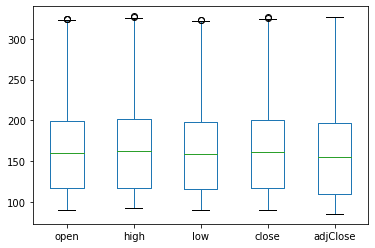

In [7]:
apple[['open','high','low','close','adjClose']].plot(kind='box')

In [8]:
# Setting the layout for our plot
layout = go.Layout(
    title='Stock Prices of Apple',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

apple_data = [{'x':apple['date'], 'y':apple['close']}]
plot = go.Figure(data=apple_data, layout=layout)

In [9]:
#plot(plot) #plotting offline
iplot(plot)

In [10]:
# Building the regression model
from sklearn.model_selection import train_test_split

#For preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#For model evaluation
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [11]:
#Split the data into train and test sets
X = np.array(apple.index).reshape(-1,1)
Y = apple['close']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [12]:
# Feature scaling
scaler = StandardScaler().fit(X_train)

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
#Creating a linear model
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

In [16]:
#Plot actual and predicted values for train dataset
trace0 = go.Scatter(
    x = X_train.T[0],
    y = Y_train,
    mode = 'markers',
    name = 'Actual'
)
trace1 = go.Scatter(
    x = X_train.T[0],
    y = lm.predict(X_train).T,
    mode = 'lines',
    name = 'Predicted'
)
apple_data = [trace0,trace1]
layout.xaxis.title.text = 'Day'
plot2 = go.Figure(data=apple_data, layout=layout)

In [17]:
iplot(plot2)

In [18]:
#Calculate scores for model evaluation
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train, lm.predict(X_train))}\t{r2_score(Y_test, lm.predict(X_test))}
{'MSE'.ljust(10)}{mse(Y_train, lm.predict(X_train))}\t{mse(Y_test, lm.predict(X_test))}
'''
print(scores)


Metric           Train                Test        
r2_score  0.8090298303461856	0.7974487573183602
MSE       642.2077880157142	586.7188955343712



# GOOGLE Stock Prediction using Stacked LSTM

In [19]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [20]:
google_data = pd.read_csv('Google_train_data.csv')
google_data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [21]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [22]:
google_data["Close"]=pd.to_numeric(google_data.Close,errors='coerce')
google_data = google_data.dropna()
train_data_g = google_data.iloc[:,4:5].values

In [23]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1149 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1149 non-null   object 
 1   Open    1149 non-null   float64
 2   High    1149 non-null   float64
 3   Low     1149 non-null   float64
 4   Close   1149 non-null   float64
 5   Volume  1149 non-null   object 
dtypes: float64(4), object(2)
memory usage: 62.8+ KB


In [24]:
sc = MinMaxScaler(feature_range=(0,1))
train_data_g = sc.fit_transform(train_data_g)
train_data_g.shape

(1149, 1)

In [25]:
X_train_g = []
y_train_g = []

for i in range (60,1149): #60 : timestep // 1149 : length of the data
    X_train_g.append(train_data_g[i-60:i,0]) 
    y_train_g.append(train_data_g[i,0])

X_train_g,y_train_g = np.array(X_train_g),np.array(y_train_g)

In [26]:
X_train_g = np.reshape(X_train_g,(X_train_g.shape[0],X_train_g.shape[1],1)) #adding the batch_size axis
X_train_g.shape

(1089, 60, 1)

In [27]:
lstm_model = Sequential()

lstm_model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train_g.shape[1],1)))
lstm_model.add(Dropout(0.2))

lstm_model.add(LSTM(units=100, return_sequences = True))
lstm_model.add(Dropout(0.2))

lstm_model.add(LSTM(units=100, return_sequences = True))
lstm_model.add(Dropout(0.2))

lstm_model.add(LSTM(units=100, return_sequences = False))
lstm_model.add(Dropout(0.2))

lstm_model.add(Dense(units =1))
lstm_model.compile(optimizer='adam',loss="mean_squared_error")

In [28]:
hist = lstm_model.fit(X_train_g, y_train_g, epochs = 100, batch_size = 32, verbose=2)

Epoch 1/100
35/35 - 28s - loss: 0.0315 - 28s/epoch - 788ms/step
Epoch 2/100
35/35 - 10s - loss: 0.0127 - 10s/epoch - 294ms/step
Epoch 3/100
35/35 - 10s - loss: 0.0101 - 10s/epoch - 277ms/step
Epoch 4/100
35/35 - 10s - loss: 0.0081 - 10s/epoch - 272ms/step
Epoch 5/100
35/35 - 10s - loss: 0.0077 - 10s/epoch - 278ms/step
Epoch 6/100
35/35 - 9s - loss: 0.0072 - 9s/epoch - 271ms/step
Epoch 7/100
35/35 - 10s - loss: 0.0073 - 10s/epoch - 278ms/step
Epoch 8/100
35/35 - 10s - loss: 0.0070 - 10s/epoch - 274ms/step
Epoch 9/100
35/35 - 10s - loss: 0.0058 - 10s/epoch - 273ms/step
Epoch 10/100
35/35 - 10s - loss: 0.0068 - 10s/epoch - 278ms/step
Epoch 11/100
35/35 - 9s - loss: 0.0062 - 9s/epoch - 267ms/step
Epoch 12/100
35/35 - 10s - loss: 0.0062 - 10s/epoch - 278ms/step
Epoch 13/100
35/35 - 9s - loss: 0.0077 - 9s/epoch - 248ms/step
Epoch 14/100
35/35 - 8s - loss: 0.0056 - 8s/epoch - 237ms/step
Epoch 15/100
35/35 - 9s - loss: 0.0054 - 9s/epoch - 261ms/step
Epoch 16/100
35/35 - 10s - loss: 0.0046 - 10

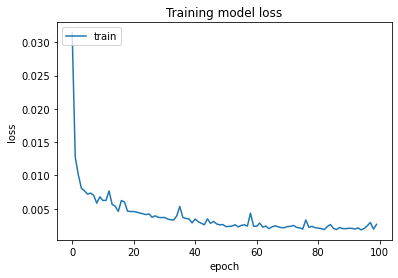

In [29]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [30]:
test_data_g = pd.read_csv('Google_test_data.csv')
test_data_g["Close"]=pd.to_numeric(test_data_g.Close,errors='coerce')
test_data_g = test_data_g.dropna()
test_data_g = test_data_g.iloc[:,4:5]
y_test_g = test_data_g.iloc[60:,0:].values 
#input array for the model
inputClosing = test_data_g.iloc[:,0:].values 
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test_g = []
length = len(test_data_g)
timestep = 60
for i in range(timestep,length):  
    X_test_g.append(inputClosing_scaled[i-timestep:i,0])
X_test_g = np.array(X_test_g)
X_test_g = np.reshape(X_test_g,(X_test_g.shape[0],X_test_g.shape[1],1))
X_test_g.shape

(192, 60, 1)

In [31]:
y_pred_g = lstm_model.predict(X_test_g)
y_pred_g

array([[1.2020853],
       [1.2423906],
       [1.2826364],
       [1.2437735],
       [1.2463441],
       [1.2000082],
       [1.2184556],
       [1.2169976],
       [1.24771  ],
       [1.2253497],
       [1.1623685],
       [1.2046485],
       [1.199678 ],
       [1.1731071],
       [1.2257528],
       [1.1924102],
       [1.2783096],
       [1.2454605],
       [1.2851651],
       [1.2957222],
       [1.1904035],
       [1.2873228],
       [1.171929 ],
       [1.2365239],
       [1.2235591],
       [1.2449672],
       [1.2311356],
       [1.2040005],
       [1.172157 ],
       [1.2041087],
       [1.1717527],
       [1.1584113],
       [1.105135 ],
       [1.1145205],
       [1.2027078],
       [1.1747217],
       [1.1846049],
       [1.1859577],
       [1.2076993],
       [1.1465137],
       [1.2640355],
       [1.2093191],
       [1.2620823],
       [1.2426803],
       [1.2522554],
       [1.2294214],
       [1.2209349],
       [1.2774832],
       [1.2524655],
       [1.2849998],


In [32]:
predicted_price_g = sc.inverse_transform(y_pred_g)

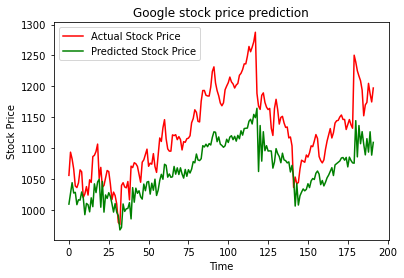

In [33]:
plt.plot(y_test_g, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price_g, color = 'green', label = 'Predicted Stock Price')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()